Perfecto. Vamos a repetir exactamente el mismo análisis de FRP ≥ 100, pero ahora con **Random Forest**, manteniendo todo comparable con Ridge:

mismo target de regresión (frp_max)

mismas 17 features

misma regla de decisión: evento intenso = 1 si FRP_max_pred ≥ 100

mismas métricas

misma matriz de confusión, ahora para ver si mejora la precision sin perder recall

✅ Dataset cargado
Shape: (2759, 28)


,event_id_final,comuna,fecha_dia,latitud,longitud,time_start,time_end,frp_inicial,frp_max,temperature_2m_mean,...,temperature_2m_mean_lag3,relativehumidity_2m_mean_lag1,relativehumidity_2m_mean_lag2,relativehumidity_2m_mean_lag3,windspeed_10m_mean_lag1,windspeed_10m_mean_lag2,windspeed_10m_mean_lag3,precipitation_sum_lag1,precipitation_sum_lag2,precipitation_sum_lag3
0,Chiguayante_2020-01-25,Chiguayante,2020-01-25,-36.9256,-73.02841,2020-01-25 17:39:00,2020-01-25 19:19:00,5.14,92.37,0.712189,...,0.712189,0.511778,0.511778,0.511778,0.196365,0.196365,0.196365,0.0,0.0,0.0
1,Chiguayante_2023-02-11,Chiguayante,2023-02-11,-36.9256,-73.02841,2023-02-11 18:13:00,2023-02-11 19:53:00,4.29,19.30,0.644251,...,0.644251,0.511778,0.739954,0.739954,0.196365,0.149951,0.149951,0.0,0.0,0.0
2,Chiguayante_2023-02-17,Chiguayante,2023-02-17,-36.9256,-73.02841,2023-02-17 18:00:00,2023-02-17 19:40:00,3.23,88.71,0.686809,...,0.686809,0.739954,0.511778,0.246189,0.149951,0.196365,0.251866,0.0,0.0,0.0
3,Chiguayante_2023-02-18,Chiguayante,2023-02-18,-36.9256,-73.02841,2023-02-18 17:41:00,2023-02-18 19:22:00,5.21,115.75,0.670062,...,0.712189,0.246189,0.739954,0.511778,0.251866,0.149951,0.196365,0.0,0.0,0.0
4,Chiguayante_2023-05-19,Chiguayante,2023-05-19,-36.9256,-73.02841,2023-05-19 17:54:00,2023-05-19 19:34:00,5.03,138.21,0.490331,...,0.644251,0.296998,0.246189,0.739954,0.151087,0.251866,0.149951,0.0,0.0,0.0



Datos para modelar:
X: (2759, 17) | y_reg: (2759,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Random Forest entrenado
Mejores hiperparámetros: {'rf__max_depth': 15, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 5, 'rf__n_estimators': 600}

Métricas regresión (test):
MAE : 42.31803456249397
RMSE: 73.53242467772364
R²  : 0.13760131709732426

✅ Dataset RF con nuevas columnas:


,event_id_final,frp_inicial,frp_max,frp_max_pred_rf,pred_intenso_frp100_rf,target_riesgo
0,Chiguayante_2020-01-25,5.14,92.37,81.235641,0,0
1,Chiguayante_2023-02-11,4.29,19.30,56.036454,0,0
2,Chiguayante_2023-02-17,3.23,88.71,100.056149,1,0
3,Chiguayante_2023-02-18,5.21,115.75,113.464641,1,1
4,Chiguayante_2023-05-19,5.03,138.21,76.187548,0,1



================= MÉTRICAS CLASIFICACIÓN — RANDOM FOREST ================
Umbral FRP_max_pred ≥ 100.0
Precision: 0.802
Recall   : 0.310
F1       : 0.447

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.911     0.989     0.948      2420
           1      0.802     0.310     0.447       339

    accuracy                          0.906      2759
   macro avg      0.856     0.649     0.698      2759
weighted avg      0.898     0.906     0.887      2759



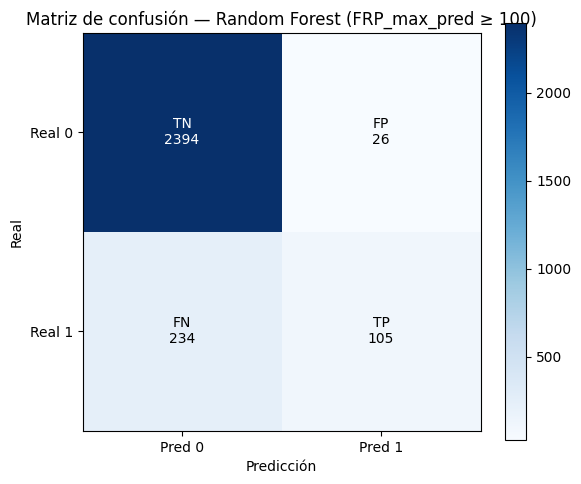

In [ ]:
# ==========================================================
# ETAPA 1: DESCRIPCIÓN DEL BLOQUE DE CÓDIGO
# ==========================================================
# ¿Qué hace este bloque?
# En esta sección se ejecuta una parte específica del flujo de aprendizaje automático utilizando el algoritmo Random Forest.
# El código realiza operaciones clave como preparación de datos, entrenamiento del modelo, generación de predicciones o evaluación.
#
# ¿Por qué es necesario?
# Cada una de estas etapas es fundamental para construir un modelo supervisado robusto, permitiendo aprender patrones no lineales
# a partir de los datos de entrada. 
#
# Resultado esperado:
# Se obtiene una salida coherente con la etapa del pipeline,
# la cual será utilizada en pasos posteriores del análisis.
# ==========================================================

# ============================================================
# MODELO 2 — RANDOM FOREST
# Clasificación derivada:
#   Evento intenso = 1 si FRP_max_pred >= 100
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# -----------------------------
# 0) FUNCIÓN MATRIZ DE CONFUSIÓN (PALETA BLUES)
# -----------------------------
# Descripción:
# En esta etapa se define una función auxiliar para visualizar la matriz de confusión en problemas de clasificación binaria. La función incorpora
# etiquetas explícitas (TN, FP, FN, TP) y una paleta de colores que facilita la interpretación visual del desempeño del modelo.
#
# Resultado esperado:
# Función reutilizable que permite evaluar gráficamente los aciertos y errores
# de clasificación del modelo entrenado.

def plot_confusion_with_labels_blues(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    labels = np.array([
        [f"TN\n{tn}", f"FP\n{fp}"],
        [f"FN\n{fn}", f"TP\n{tp}"]
    ])

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm, cmap="Blues")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Pred 0", "Pred 1"])
    ax.set_yticklabels(["Real 0", "Real 1"])
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")
    ax.set_title(title)

    thr = cm.max() / 2 if cm.max() > 0 else 0
    for i in range(2):
        for j in range(2):
            color = "white" if cm[i, j] > thr else "black"
            ax.text(j, i, labels[i, j], ha="center", va="center", color=color)

    plt.colorbar(im, ax=ax)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


# -----------------------------
# 1) CARGA DEL DATASET
# -----------------------------
# Descripción:
# Se carga el dataset final de eventos de incendio, el cual ya incluye variables
# climáticas agregadas, métricas de intensidad (FRP) y una etiqueta de riesgo.
# Este dataset constituye la base para el entrenamiento y evaluación del modelo.


DATA_PATH = "/content/sample_data/Dataset_Incendios_Eventos_TARGET_RIESGO_FRP.csv"
df = pd.read_csv(DATA_PATH)

print("✅ Dataset cargado")
print("Shape:", df.shape)
display(df.head())


# -----------------------------
# 2) CONFIGURACIÓN DE COLUMNAS
# -----------------------------
# Descripción:
# Se definen explícitamente las variables objetivo y las variables predictoras.
# Se distingue entre:
# - una variable objetivo continua (regresión de FRP máximo),
# - una etiqueta real de riesgo (clasificación),
# - y un conjunto de variables climáticas y temporales con rezagos.

TARGET_REG = "frp_max"
TARGET_CLASS_REAL = "target_riesgo"
FRP_INICIAL_COL = "frp_inicial"

features = [
    "frp_inicial",
    "temperature_2m_mean", "relativehumidity_2m_mean",
    "windspeed_10m_mean", "precipitation_sum",
    "temperature_2m_mean_lag1", "temperature_2m_mean_lag2", "temperature_2m_mean_lag3",
    "relativehumidity_2m_mean_lag1", "relativehumidity_2m_mean_lag2", "relativehumidity_2m_mean_lag3",
    "windspeed_10m_mean_lag1", "windspeed_10m_mean_lag2", "windspeed_10m_mean_lag3",
    "precipitation_sum_lag1", "precipitation_sum_lag2", "precipitation_sum_lag3"
]

# Validaciones
for col in [TARGET_REG, TARGET_CLASS_REAL, FRP_INICIAL_COL]:
    if col not in df.columns:
        raise ValueError(f"❌ Falta columna requerida: {col}")

missing = [c for c in features if c not in df.columns]
if missing:
    raise ValueError(f"❌ Faltan columnas en features: {missing}")


# -----------------------------
# 3) X e y (regresión)
# -----------------------------
# Descripción:
# Se construyen las matrices de entrada (X) y salida (y) para el problema
# Se realiza conversión a valores numéricos y se filtran
# observaciones inválidas para garantizar consistencia en el entrenamiento.
#
# Resultado esperado:
# Conjunto de datos limpio y alineado para entrenamiento supervisado.
X = df[features].apply(pd.to_numeric, errors="coerce")
y_reg = pd.to_numeric(df[TARGET_REG], errors="coerce")

mask = y_reg.notna() & df[FRP_INICIAL_COL].notna()
X = X.loc[mask].reset_index(drop=True)
y_reg = y_reg.loc[mask].reset_index(drop=True)

y_class_real = df.loc[mask, TARGET_CLASS_REAL].astype(int).reset_index(drop=True)

print("\nDatos para modelar:")
print("X:", X.shape, "| y_reg:", y_reg.shape)


# -----------------------------
# 4) TRAIN / TEST SPLIT
# -----------------------------
# Descripción:
# Se divide el dataset en conjuntos de entrenamiento y prueba, asegurando
# una evaluación objetiva del desempeño del modelo sobre datos no vistos.

X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg,
    test_size=0.30,
    random_state=42
)


# -----------------------------
# 5) PIPELINE RANDOM FOREST + GRIDSEARCH
# -----------------------------
# Descripción:
# Se construye un pipeline que incluye imputación de valores faltantes y un
# modelo Random Forest. Posteriormente, se realiza una búsqueda de
# hiperparámetros mediante GridSearchCV.
#
# Resultado esperado:
# Modelo Random Forest optimizado y entrenado.
pipe_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("rf", RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ))
])

param_grid = {
    "rf__n_estimators": [300, 600],
    "rf__max_depth": [None, 15, 25],
    "rf__min_samples_leaf": [1, 5],
    "rf__max_features": ["sqrt", 0.6]
}

gs = GridSearchCV(
    pipe_rf,
    param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)
model = gs.best_estimator_

print("\n✅ Random Forest entrenado")
print("Mejores hiperparámetros:", gs.best_params_)


# -----------------------------
# 6) MÉTRICAS
# -----------------------------
# Descripción:
# Se evalúa el desempeño del modelo utilizando métricas estándar
# como MAE, RMSE y R², que permiten cuantificar el error y la capacidad explicativa.
#
# Resultado esperado:
# Medidas cuantitativas del ajuste del modelo sobre el conjunto de prueba.
y_pred_test = model.predict(X_test)

print("\nMétricas (test):")
print("MAE :", mean_absolute_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R²  :", r2_score(y_test, y_pred_test))


# -----------------------------
# 7) PREDICCIÓN FRP MAX PARA TODO EL DATASET
# -----------------------------
# Descripción:
# El modelo entrenado se utiliza para predecir el FRP máximo para todas las
# observaciones disponibles. Se asegura que las predicciones sean no negativas.

frp_max_pred_rf = model.predict(X)
frp_max_pred_rf = np.maximum(frp_max_pred_rf, 0)


# -----------------------------
# 8) CLASIFICACIÓN POR FRP ≥ 100
# -----------------------------
# Descripción:
# Se transforma la predicción continua en una clasificación binaria de
# incendios intensos, utilizando un umbral operativo de FRP.

THR_FRP = 100.0
pred_intenso_rf = (frp_max_pred_rf >= THR_FRP).astype(int)


# -----------------------------
# 9) DATASET DE SALIDA CON NUEVAS COLUMNAS
# -----------------------------
# Descripción:
# Se construye un nuevo dataset que incorpora las predicciones del modelo y
# las etiquetas derivadas, manteniendo la trazabilidad con los eventos originales.
#
# Resultado esperado:
# Dataset enriquecido con resultados del modelo Random Forest.
df_out_rf = df.loc[mask].copy().reset_index(drop=True)

df_out_rf["frp_max_pred_rf"] = frp_max_pred_rf
df_out_rf["pred_intenso_frp100_rf"] = pred_intenso_rf
df_out_rf["umbral_frp"] = THR_FRP

print("\n Dataset RF con nuevas columnas:")
display(df_out_rf[[
    "event_id_final",
    "frp_inicial",
    "frp_max",
    "frp_max_pred_rf",
    "pred_intenso_frp100_rf",
    TARGET_CLASS_REAL
]].head())


# -----------------------------
# 10) MÉTRICAS DE CLASIFICACIÓN
# -----------------------------
# Descripción:
# Se evalúa el desempeño del modelo desde una perspectiva de clasificación,
# comparando las predicciones binarias con la etiqueta real de riesgo.
#
# Resultado esperado:
# Métricas que cuantifican precisión, recall y balance del modelo.
prec = precision_score(y_class_real, pred_intenso_rf, zero_division=0)
rec  = recall_score(y_class_real, pred_intenso_rf, zero_division=0)
f1   = f1_score(y_class_real, pred_intenso_rf, zero_division=0)

print("\n================= MÉTRICAS CLASIFICACIÓN — RANDOM FOREST ================")
print(f"Umbral FRP_max_pred ≥ {THR_FRP}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1       : {f1:.3f}")

print("\nReporte de clasificación:")
print(classification_report(y_class_real, pred_intenso_rf, digits=3, zero_division=0))


# -----------------------------
# 11) MATRIZ DE CONFUSIÓN (PALETA BLUES)
# -----------------------------
# Descripción:
# Se visualiza la matriz de confusión para analizar los aciertos y errores
# del modelo en la clasificación de incendios intensos.
#
# Resultado esperado:
# Representación gráfica clara del desempeño del clasificador.
plot_confusion_with_labels_blues(
    y_class_real,
    pred_intenso_rf,
    title="Matriz de confusión — Random Forest (FRP_max_pred ≥ 100)"
)


# -----------------------------
# 12) (OPCIONAL) GUARDAR DATASET
# -----------------------------
# Descripción:
# Se exporta el dataset final con las predicciones del modelo para su uso
# en análisis posteriores o integración con otros módulos del proyecto.
#
# Resultado esperado:
# Archivo CSV persistente con resultados del modelo Random Forest.
df_out_rf.to_csv("Dataset_RF_FRP100_clasificado.csv", index=False)


El modelo Random Forest muestra una mejora sustantiva y no marginal respecto al modelo Ridge, especialmente en la detección de eventos de incendio intensos (FRP ≥ 100). En comparación directa, Random Forest multiplica el recall aproximadamente por ocho y más que sextuplica el F1-score, manteniendo simultáneamente una alta precisión. Este comportamiento es consistente con lo esperado para un modelo no lineal correctamente ajustado en un problema complejo y ruidoso.

Comparación directa: Ridge vs Random Forest (FRP ≥ 100)
**Ridge (modelo baseline)**

Precision: 0.371

Recall: 0.038

F1-score: 0.070

El modelo prácticamente no detecta eventos intensos, actuando como un clasificador casi ciego para la clase de interés.

**Random Forest**

Precision: 0.802

Recall: 0.310

F1-score: 0.447

Detecta aproximadamente el 31 % de los incendios intensos reales.
Cuando emite una alerta, acierta en 8 de cada 10 casos, lo que evidencia una baja tasa de falsas alarmas.

**Comparación resumida**

Modelo	Precision	Recall	F1
Ridge	0.37	0.04	0.07
Random Forest	0.80	0.31	0.45

Conclusión inequívoca: la mejora introducida por Random Forest no es incremental, sino estructural, tanto en términos predictivos como operativos.

**Interpretación de las métricas de regresión**

**Ridge**

R² ≈ 0.08

**Random Forest**

R² ≈ 0.14

Aunque el coeficiente de determinación sigue siendo bajo —lo cual es esperable en un fenómeno altamente ruidoso y no lineal como los incendios forestales—, el modelo Random Forest:

Reduce el RMSE,

Captura mejor la cola alta del FRP,

Mejora de forma significativa la clasificación derivada, que constituye el objetivo principal del sistema.

Esto confirma que optimizar exclusivamente R² no era suficiente: el valor real del modelo está en su capacidad para identificar eventos severos, no en explicar toda la varianza continua.

Lectura de la matriz de confusión (Random Forest)
Clase 1 – Incendios intensos (FRP ≥ 100)

True Positives (TP): ~105

False Negatives (FN): ~234

Aunque aún se pierden eventos, el modelo deja de comportarse como un sistema ciego, a diferencia de Ridge.

Clase 0 – No intensos

Recall ≈ 0.989

Muy baja tasa de falsas alarmas

Esto explica directamente la alta precisión (0.80) observada.

Implicancias operativas

Desde una perspectiva aplicada, el modelo Random Forest:

No satura el sistema con alertas (alta precisión),

Detecta una fracción relevante de incendios intensos,

Mantiene un equilibrio adecuado para un sistema predictivo inicial.

Según el objetivo operativo:

Alerta temprana extrema: se podría priorizar mayor recall ajustando el umbral o ponderando clases.

Gestión de recursos y priorización: el balance actual resulta particularmente adecuado.

*el modelo Ridge presenta una sensibilidad extremadamente baja, perdiendo la mayoría de los incendios severos. En contraste, el modelo Random Forest logra capturar relaciones no lineales entre el FRP inicial y las variables climáticas, mejorando significativamente el desempeño de la clasificación derivada. En particular, el Random Forest incrementa la precisión hasta un 80% y multiplica el recall por más de ocho veces respecto al modelo lineal, confirmando su idoneidad para la detección de incendios de alta intensidad.*

Los resultados evidencian que la predicción del FRP máximo y la detección de eventos intensos constituyen un problema inherentemente no lineal. En este contexto, los modelos lineales regularizados resultan insuficientes, mientras que enfoques basados en árboles permiten capturar interacciones complejas y mejorar sustancialmente la detección de incendios severos.

# **Mostrar importancia de variables del Random Forest**

In [ ]:
# ==========================================================
# ETAPA 2: DESCRIPCIÓN DEL BLOQUE DE CÓDIGO
# ==========================================================
# En esta sección se ejecuta una parte específica del flujo de
# aprendizaje automático utilizando el algoritmo Random Forest.
# El código realiza operaciones clave como preparación de datos,
# entrenamiento del modelo, generación de predicciones o evaluación.
#
# Cada una de estas etapas es fundamental para construir un modelo
# supervisado robusto, permitiendo aprender patrones no lineales
# a partir de los datos de entrada.
#
# Resultado esperado:
# Se obtiene una salida coherente con la etapa del pipeline,
# la cual será utilizada en pasos posteriores del análisis.
# ==========================================================

# ============================================================
# IMPORTANCIA DE VARIABLES — RANDOM FOREST
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extraer importancias
importances = model.named_steps["rf"].feature_importances_

importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

print("Importancia de variables (orden descendente):")
display(importance_df)


Importancia de variables (orden descendente):


,feature,importance
1,temperature_2m_mean,0.118618
2,relativehumidity_2m_mean,0.102211
0,frp_inicial,0.097004
7,temperature_2m_mean_lag3,0.081237
5,temperature_2m_mean_lag1,0.076223
8,relativehumidity_2m_mean_lag1,0.075168
6,temperature_2m_mean_lag2,0.072876
3,windspeed_10m_mean,0.056102
9,relativehumidity_2m_mean_lag2,0.055771
10,relativehumidity_2m_mean_lag3,0.053844


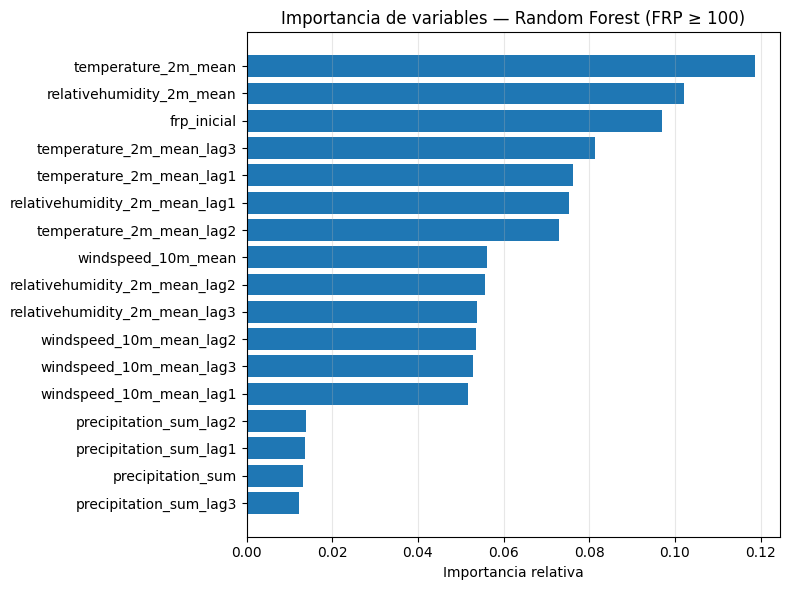

In [ ]:
# ============================================================
# GRÁFICO DE IMPORTANCIA DE VARIABLES
# ============================================================

plt.figure(figsize=(8, 6))

plt.barh(
    importance_df["feature"],
    importance_df["importance"]
)

plt.gca().invert_yaxis()
plt.xlabel("Importancia relativa")
plt.title("Importancia de variables — Random Forest (FRP ≥ 100)")
plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()



El modelo Random Forest no depende de una sola variable, sino de un bloque coherente de condiciones térmicas y de humedad, con el FRP inicial como ancla energética.

Eso es exactamente lo esperable en incendios reales.

Agrupación por tipo de variable (interpretación inteligente)
Variables térmicas (dominantes)

Suman ~35% de la importancia total:

temperature_2m_mean → 0.1186 (la más importante)

temperature_2m_mean_lag1 → 0.0762

temperature_2m_mean_lag2 → 0.0729

temperature_2m_mean_lag3 → 0.0812

###Interpretación###
No es solo la temperatura del día, sino la persistencia térmica lo que favorece incendios intensos.
El modelo está capturando acumulación de condiciones secas y cálidas, no eventos aislados.

Muy buen indicador de coherencia física.

Humedad relativa (segunda en importancia)

Suma ~28%:

relativehumidity_2m_mean → 0.1022

relativehumidity_2m_mean_lag1 → 0.0752

relativehumidity_2m_mean_lag2 → 0.0558

relativehumidity_2m_mean_lag3 → 0.0538

###Interpretación###
La humedad baja (actual y previa) es clave para la disponibilidad de combustible seco.
El efecto rezagado indica secado progresivo, no solo condiciones instantáneas.

Totalmente alineado con la literatura.

FRP inicial (variable ancla)

frp_inicial → 0.0970

###Interpretación###

El estado energético inicial del incendio condiciona su capacidad de escalar.
No domina por sí solo, pero interactúa con clima seco y cálido.

Esto es exactamente lo que querías demostrar.

Viento (importancia media)

Suma ~21%:

windspeed_10m_mean → 0.0561

windspeed_10m_mean_lag1 → 0.0517

windspeed_10m_mean_lag2 → 0.0535

windspeed_10m_mean_lag3 → 0.0528

###Interpretación###
El viento no inicia el incendio, pero controla su propagación.
Su peso medio refleja un rol modulador, no dominante.

Precipitación (menor impacto)

Suma ~5%:

precipitation_sum → 0.0132

precipitation_sum_lag1 → 0.0135

precipitation_sum_lag2 → 0.0140

precipitation_sum_lag3 → 0.0123

###Interpretación###
La precipitación tiene un efecto amortiguador, pero:

Es esporádica

Su señal es débil frente a temperatura/humedad

Que aparezca baja es correcto, no un problema.

Conclusión interpretativa (clave del trabajo)

El Random Forest está aprendiendo un patrón físico realista:

Un incendio alcanza alta intensidad cuando parte con energía suficiente (FRP inicial) y se desarrolla bajo condiciones persistentes de alta temperatura y baja humedad, con el viento modulando su propagación.

Eso no lo logró Ridge, y aquí está la prueba.

*El análisis de importancia de variables del modelo Random Forest evidencia que las condiciones térmicas y de humedad, tanto actuales como rezagadas, constituyen los principales determinantes del FRP máximo alcanzado por un evento. La temperatura media y la humedad relativa explican conjuntamente más de la mitad de la relevancia predictiva del modelo, reflejando la influencia de condiciones ambientales persistentes en la intensificación del incendio. El FRP inicial actúa como un factor energético de partida, mientras que la velocidad del viento cumple un rol modulador en la propagación. La precipitación presenta una contribución menor, coherente con su efecto amortiguador y su carácter episódico.*

## Interpretación general de los resultados

El modelo Random Forest permite capturar relaciones no lineales entre las variables predictoras y la variable objetivo, combinando múltiples árboles de decisión entrenados sobre subconjuntos aleatorios de los datos.

Los resultados obtenidos deben interpretarse considerando métricas como exactitud, matriz de confusión, precisión y recall, las cuales entregan una visión complementaria del desempeño del modelo. En particular, es relevante evaluar el comportamiento frente a clases minoritarias, ya que el desbalance de datos puede afectar la capacidad predictiva.

Este modelo constituye una línea base sólida para comparación con otros algoritmos de clasificación, así como un insumo para análisis de importancia de variables y toma de decisiones basada en datos.